In [14]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from datetime import datetime
import requests
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import itertools
import math
#import warnings
#warnings.filterwarnings("ignore")

In [20]:
X_train=pd.read_csv('X_train')
X_train=pd.DataFrame(X_train)
X_train.set_index(X_train['can_order_from_date'],inplace=True)
X_train.drop('can_order_from_date',axis='columns',inplace=True)
X_train.head()

,can_order_from_time,can_order_from_month,stay_duration,is_weekday,tempmax,tempmin,temp,feelslikemax,feelslikemin,humidity,can_order_from_day_encoded
can_order_from_date,,,,,,,,,,,
2022-07-01,06:30:00,7,1 days 17:30:00,1,0.334933,0.681839,0.540516,0.373411,0.742521,0.934877,0
2022-07-02,07:40:00,7,1 days 16:20:00,0,0.902123,0.373306,0.725053,0.907788,0.444356,-0.327431,2
2022-07-03,15:45:00,7,10 days 08:15:00,0,1.524919,1.098359,1.450020,1.379297,1.092541,-1.422547,3
2022-07-04,14:25:00,7,11 days 09:35:00,1,1.169036,1.499453,1.344570,1.159259,1.429598,-0.594941,1
2022-07-05,08:30:00,7,5 days 15:30:00,1,1.068943,1.329759,1.212758,1.064958,1.286997,-0.661818,5


In [21]:
y_train=pd.read_csv('y_train')
y_train=pd.DataFrame(y_train)
y_train.set_index(y_train['can_order_from_date'],inplace=True)
y_train.drop('can_order_from_date',axis='columns',inplace=True)
y_train.tail()

,patient_count
can_order_from_date,
2023-09-26,199
2023-09-27,213
2023-09-28,223
2023-09-29,223
2023-09-30,186


In [18]:
X_val=pd.read_csv('X_val')
X_val.set_index(X_val['can_order_from_date'],inplace=True)
X_val.drop('can_order_from_date',axis='columns',inplace=True)
#X_val.head()

,can_order_from_time,can_order_from_month,stay_duration,is_weekday,tempmax,tempmin,temp,feelslikemax,feelslikemin,humidity,can_order_from_day_encoded
can_order_from_date,,,,,,,,,,,
2023-10-01,11:30:00,10,4 days 12:30:00,0,0.768667,0.296173,0.514154,0.782052,0.327683,0.157429,3
2023-10-02,07:45:00,10,2 days 16:15:00,1,1.057822,0.311599,0.659147,1.054480,0.431392,0.006955,1
2023-10-03,12:00:00,10,3 days 12:00:00,1,1.246885,0.728119,1.028221,1.180215,0.781412,-1.071441,5
2023-10-04,11:13:00,10,5 days 12:47:00,1,0.212598,0.265319,0.250529,0.258154,0.353610,-0.193677,6
2023-10-05,08:00:00,10,3 days 16:00:00,1,0.145870,-0.166627,0.013268,0.195286,0.029517,0.349701,4


In [9]:
X_test=pd.read_csv('X_test')
X_test.set_index(X_test['can_order_from_date'],inplace=True)
X_test.drop('can_order_from_date',axis='columns',inplace=True)
X_test.head()

In [10]:
y_val=pd.read_csv('y_val')
y_val.set_index(y_val['can_order_from_date'],inplace=True)
y_val.drop('can_order_from_date',axis='columns',inplace=True)
y_val.head()

In [11]:
y_test=pd.read_csv('y_test')
y_test.set_index(y_test['can_order_from_date'],inplace=True)
y_test.drop('can_order_from_date',axis='columns',inplace=True)
y_test.head()

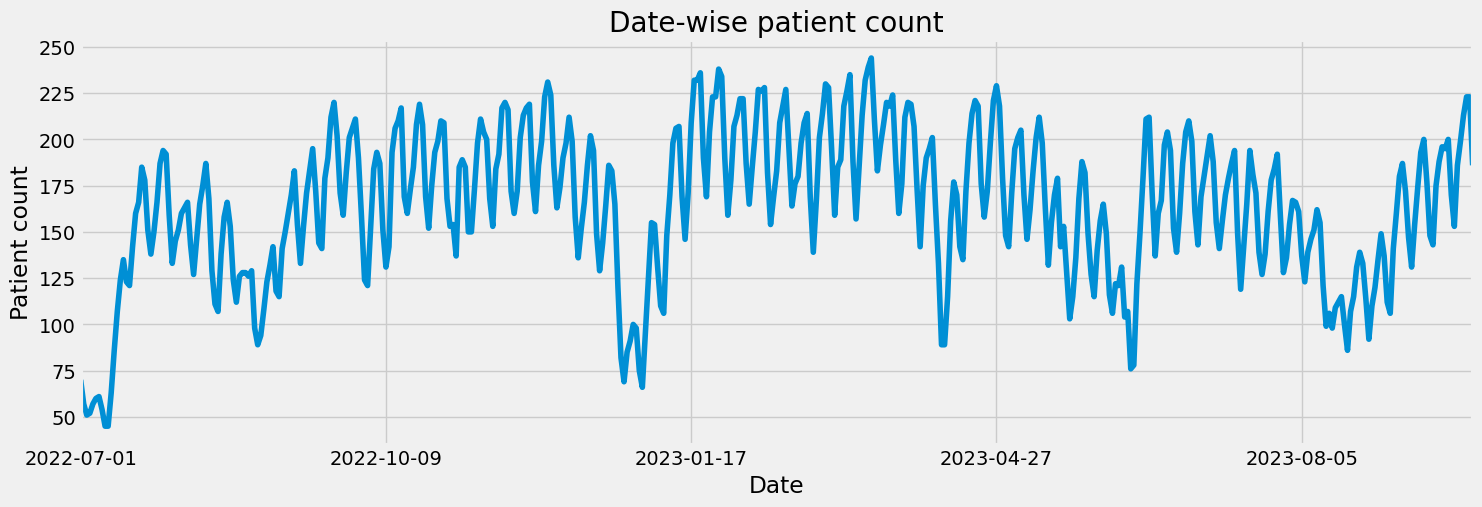

In [22]:
#datewise patient count plot
title='Date-wise patient count'
ylabel='Patient count'
xlabel='Date'

train_label=pd.DataFrame(y_train)
train_label['patient_count']
train_data=pd.DataFrame(X_train)

ax = train_label['patient_count'].plot(figsize=(16,5),title=title)

# Iterate through the DataFrame to find holidays and plot red lines
#for date, is_holiday in train_data['is_holiday'].items():
#    if is_holiday == 1:
#        ax.axvline(date, color='red', linestyle='-', linewidth=1)

ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

plt.show()

# 1. SARIMA

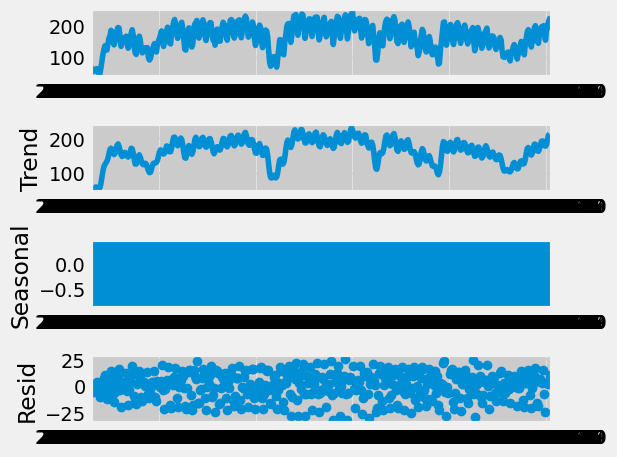

<Figure size 2000x2000 with 0 Axes>

In [17]:
# Perform seasonal decomposition
add_decomposition = sm.tsa.seasonal_decompose(y_train, 
                                          model='additive', 
                                          period=4)

# Extract the decomposed components
trend = add_decomposition.trend
seasonal = add_decomposition.seasonal
residual = add_decomposition.resid

# Plot the decomposed components
add_decomposition.plot()
plt.figure(figsize=(20, 20))
plt.show()

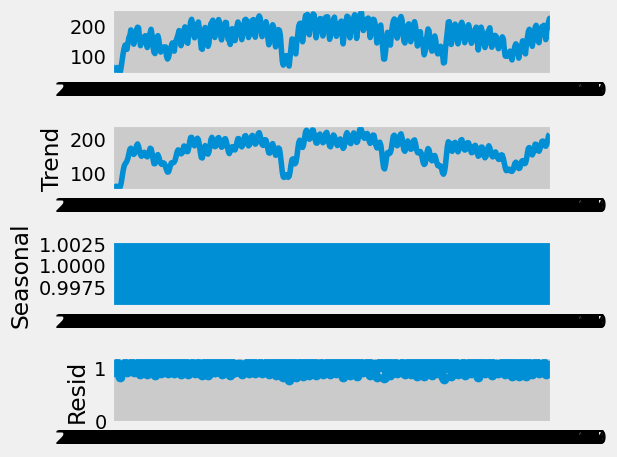

In [19]:
# Perform seasonal decomposition
multi_decomposition = sm.tsa.seasonal_decompose(y_train, 
                                          model='multiplicative', 
                                          period=4)

# Extract the decomposed components
trend = multi_decomposition.trend
seasonal = multi_decomposition.seasonal
residual = multi_decomposition.resid

# Plot the decomposed components
multi_decomposition.plot()
plt.show()

In [23]:
model = sm.tsa.SARIMAX(y_train, order=(10, 0, 2), seasonal_order=(0, 0, 0, 0))
result = model.fit()

# Show the summary
#result.summary()

/Users/akankshachawla/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/akankshachawla/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.99983D+00    |proj g|=  6.64049D-01

At iterate    5    f=  3.92560D+00    |proj g|=  9.06929D-02

At iterate   10    f=  3.92241D+00    |proj g|=  8.28472D-03

At iterate   15    f=  3.91891D+00    |proj g|=  6.42228D-02

At iterate   20    f=  3.91438D+00    |proj g|=  1.77231D-02

At iterate   25    f=  3.91395D+00    |proj g|=  7.14700D-03

At iterate   30    f=  3.91352D+00    |proj g|=  2.37132D-02

At iterate   35    f=  3.91273D+00    |proj g|=  1.16457D-02

At iterate   40    f=  3.91255D+00    |proj g|=  1.02246D-02

At iterate   45    f=  3.91173D+00    |proj g|=  2.54849D-02

At iterate   50    f=  3.91120D+00    |proj g|=  2.50524D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/akankshachawla/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [25]:
forecast = result.get_forecast(steps=60)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

In [26]:
print(confidence_intervals)

            lower patient_count  upper patient_count
2023-10-01           143.351050           190.019433
2023-10-02           150.090007           221.406193
2023-10-03           154.469941           241.398768
2023-10-04           159.307136           255.979515
2023-10-05           163.902502           266.812870
2023-10-06           156.790595           262.774891
2023-10-07           125.155356           234.182596
2023-10-08           102.598709           223.343791
2023-10-09           109.480386           243.752706
2023-10-10           118.431988           261.370881
2023-10-11           125.851699           274.364767
2023-10-12           131.376502           282.762223
2023-10-13           124.012643           276.841497
2023-10-14            98.661236           253.079798
2023-10-15            81.970076           242.350438
2023-10-16            88.222965           256.267166
2023-10-17            98.765196           272.515915
2023-10-18           107.166753           284.

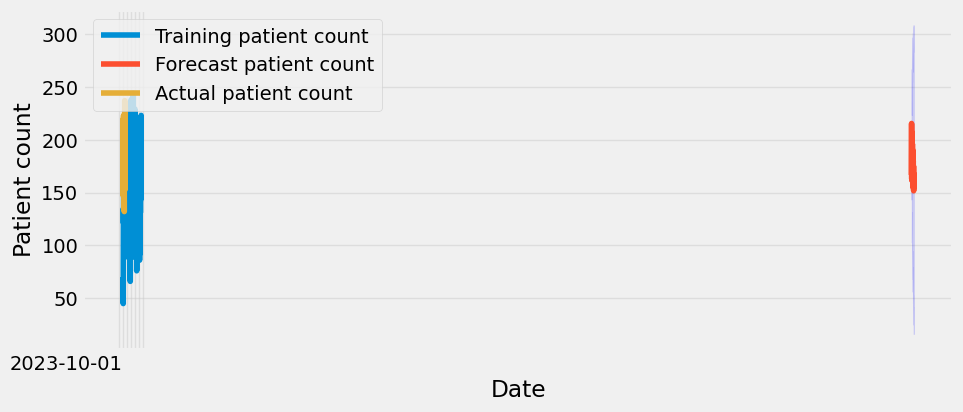

In [27]:
ax = y_train.plot(figsize=(10,5))
forecast_values.plot()
y_val.plot(ax=ax)
plt.fill_between(forecast_values.index, 
                 confidence_intervals['lower patient_count'], 
                 confidence_intervals['upper patient_count'], 
                 color='blue',
                 alpha=0.15)
plt.legend(['Training patient count', 
            'Forecast patient count', 
            'Actual patient count'], 
           loc='upper left')
plt.xlabel('Date')
plt.ylabel('Patient count')
plt.grid(alpha=0.5)
plt.show()

# 2. Prophet


In [3]:
from prophet import Prophet

/Users/akankshachawla/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from itertools import product

# Assuming you have a DataFrame named 'df' with 'ds' and 'y' columns

# Define the parameter grid with a step size
changepoint_prior_scale_values = np.arange(0.01, 0.5,0.01)  # Adjust the start, stop, and step as needed
seasonality_prior_scale_values = np.arange(1, 10,1)  # Adjust the start, stop, and step as needed

param_grid = {
    'changepoint_prior_scale': changepoint_prior_scale_values,
    'seasonality_prior_scale': seasonality_prior_scale_values,
    # Add other parameters you want to tune
}

# Generate all possible combinations of parameters
param_combinations = list(product(*param_grid.values()))

print(param_combinations)

[(0.01, 1), (0.01, 2), (0.01, 3), (0.01, 4), (0.01, 5), (0.01, 6), (0.01, 7), (0.01, 8), (0.01, 9), (0.02, 1), (0.02, 2), (0.02, 3), (0.02, 4), (0.02, 5), (0.02, 6), (0.02, 7), (0.02, 8), (0.02, 9), (0.03, 1), (0.03, 2), (0.03, 3), (0.03, 4), (0.03, 5), (0.03, 6), (0.03, 7), (0.03, 8), (0.03, 9), (0.04, 1), (0.04, 2), (0.04, 3), (0.04, 4), (0.04, 5), (0.04, 6), (0.04, 7), (0.04, 8), (0.04, 9), (0.05, 1), (0.05, 2), (0.05, 3), (0.05, 4), (0.05, 5), (0.05, 6), (0.05, 7), (0.05, 8), (0.05, 9), (0.06, 1), (0.06, 2), (0.06, 3), (0.06, 4), (0.06, 5), (0.06, 6), (0.06, 7), (0.06, 8), (0.06, 9), (0.07, 1), (0.07, 2), (0.07, 3), (0.07, 4), (0.07, 5), (0.07, 6), (0.07, 7), (0.07, 8), (0.07, 9), (0.08, 1), (0.08, 2), (0.08, 3), (0.08, 4), (0.08, 5), (0.08, 6), (0.08, 7), (0.08, 8), (0.08, 9), (0.09, 1), (0.09, 2), (0.09, 3), (0.09, 4), (0.09, 5), (0.09, 6), (0.09, 7), (0.09, 8), (0.09, 9), (0.1, 1), (0.1, 2), (0.1, 3), (0.1, 4), (0.1, 5), (0.1, 6), (0.1, 7), (0.1, 8), (0.1, 9), (0.11, 1), (0.11, 